<a href="https://colab.research.google.com/github/kikiru328/Bone_Detection/blob/main/OpenCV_study_code/OpenCV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV 임게점 처리 1

- 이미지의 기본 : 이진화 (binary)
cv2.threshold( image, thresh, max_value, type ) : 임계값을 기준으로 흑/백으로 분류하는 함수

  - image : 처리할 Gray Scale 이미지
  - thresh : 임계값 (전체 픽셀에 적용)
  - max_value : 임계값을 넘었을 때 적용할 값
  - type : 임계점을 처리하는 방식
    - THRESH_BINARY : 임계값보다 크면 max_value, 작으면 0
    - THRESH_BINARY_INV : 임계값보다 작으면 mavx_value, 크면 0
    - THRESH_TRUNC : 임계값보다 크면 임계값, 작으면 그대로
    - THRESH_TOZERO : 임계값보다 크면 그대로, 작으면 0
    - THRESH_TOZERO_INV : 임계값보다 크면 0, 작으면 그대로

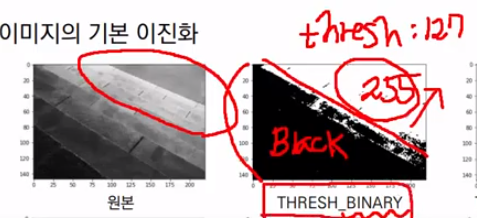

In [14]:
from google.colab import files
uploaded = files.upload()

Saving gray_image.jpg to gray_image.jpg


## THRESH_BINARY
-  임계값보다 크면 max_value, 작으면 0

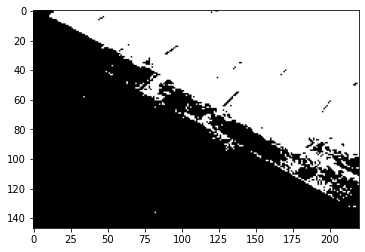

In [20]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

# 특정한 threashold를 넘는것과 안넘는 것에 대해서 지정해줌.
# 임계점을 넘어가는 것에 대해선 255로 값을 바꾸고 나머지는 0으로 
# 즉, 밝기가 127이상을 넘어가는것은 흰색, 그렇지 않으면 흑색.
ret, thres1 = cv2.threshold( image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor( thres1, cv2.COLOR_GRAY2RGB ))
plt.show()

## THRESH_BINARY_INV
-  임계값보다 작으면 mavx_value, 크면 0

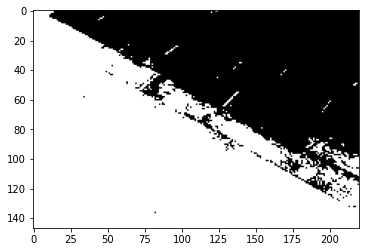

In [22]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

# 특정한 threashold를 넘는것과 안넘는 것에 대해서 지정해줌.
# 임계점보다 작은 값은 모두 255, 임계값을 넘는 것들은 모두 0 으로.
# 즉, 밝기가 127이상을 넘어가는것은 흰색, 그렇지 않으면 흑색.
ret, thres2 = cv2.threshold( image, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(cv2.cvtColor( thres2, cv2.COLOR_GRAY2RGB ))
plt.show()

## THRESH_TRUNC 
- 임계값보다 크면 임계값, 작으면 그대로

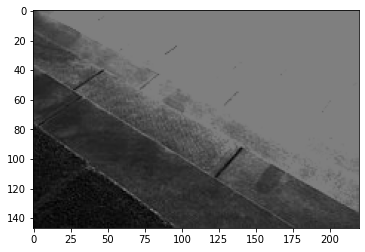

In [24]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

# 특정한 threashold를 넘는것과 안넘는 것에 대해서 지정해줌.
# 임계값 보다 큰 픽셀은 임계값으로 지정, 작으면 그대로 내비둠.
# 즉, 밝기가 127이상을 넘어가는것은 127로, 그렇지 않으면 원상태 그대로.
ret, thres3 = cv2.threshold( image, 127, 255, cv2.THRESH_TRUNC)
plt.imshow(cv2.cvtColor( thres3, cv2.COLOR_GRAY2RGB ))
plt.show()

## THRESH_TOZERO
- 임계값보다 크면 그대로, 작으면 0

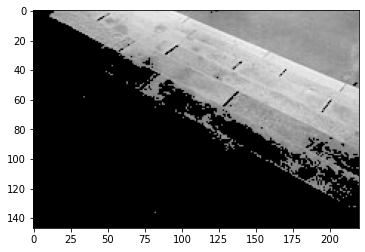

In [26]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

# 특정한 threashold를 넘는것과 안넘는 것에 대해서 지정해줌.
# 임계값 보다 크면 그대로, 작으면 0 값으로 지정.
# 즉, 밝기가 127이상을 넘어가는것은 원상태 그대로, 작은 것들은 모두 흑백으로 지정.
ret, thres4 = cv2.threshold( image, 127, 255, cv2.THRESH_TOZERO)
plt.imshow(cv2.cvtColor( thres4, cv2.COLOR_GRAY2RGB ))
plt.show()

## THRESH_TOZERO_INV 
- 임계값보다 크면 0, 작으면 그대로

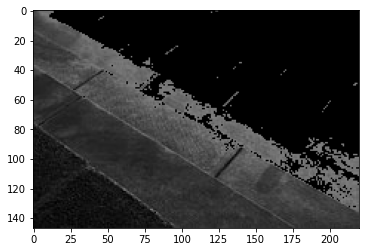

In [27]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

# 특정한 threashold를 넘는것과 안넘는 것에 대해서 지정해줌.
# 임계값 보다 크면 0, 작으면 그대로.
# 즉, 밝기가 127이상을 넘어가는것은 흑백, 작은 것들은 모두 원상태 그대로.
ret, thres5 = cv2.threshold( image, 127, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(cv2.cvtColor( thres5, cv2.COLOR_GRAY2RGB ))
plt.show()

## 통합

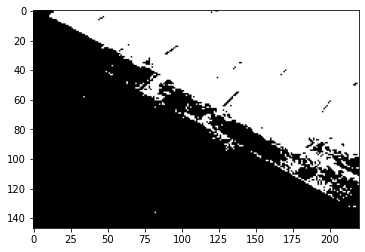

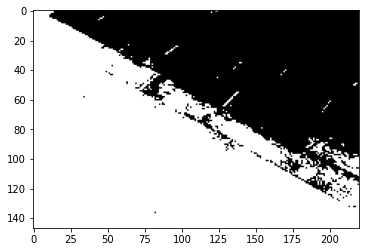

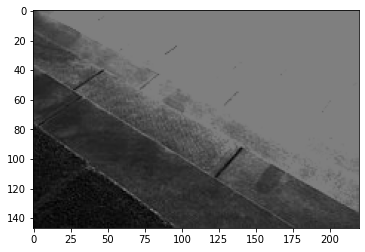

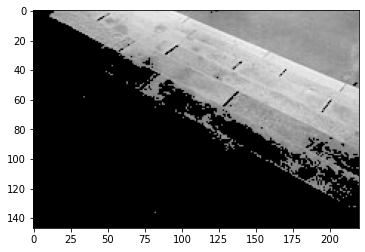

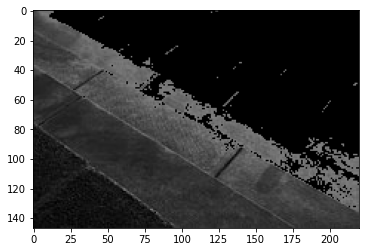

In [31]:
images = []
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)
for i in images:
  plt.imshow(cv2.cvtColor( i, cv2.COLOR_GRAY2RGB))
  plt.show()

# OpenCV 임계점 처리하기 2

## 이미지의 적응 임계점 처리
__[하나의 이미지에 다수의 조명 상태가 존재하는 경우]__

_[임계값을 직접 정해주는게 아니라, 자동으로 이미지에서 적절한 임계값을 설정해서 사용하도록 만듬]_

cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_sizem C)
  - max_valkue : 임계값을 넘었을 때 적용할 값
  - adaptive_method : 임계갑을 결정하는 계산방법
    - ADAPTIVE_THRESH_MEAN_C : 주변영역의 평균값으로 결정
    - ADAPTIVE_THRESH_GAUSSIAN_C
  - type : 임계점을 처리하는 방식
  - block_size : 임계값을 적용할 영역의 크기
  - C : 평균이나 가중평균에서 차감할 값

  * Adaptive Threshold를 이용하면, 전체 픽셀을 기준으로 임계값을 적용하지 않습니다.


In [33]:
from google.colab import files
uploaded = files.upload()

Saving hand_writing_image.jpg to hand_writing_image (1).jpg


## ADAPTIVE_THRESH_MEAN_C
- 적용할 픽셀 (x,y)를 중심으로 하는 Block Size * Block Size안에 있는 픽셀 값의 평균에서 C를 뺀 값을 임계점으로 설정

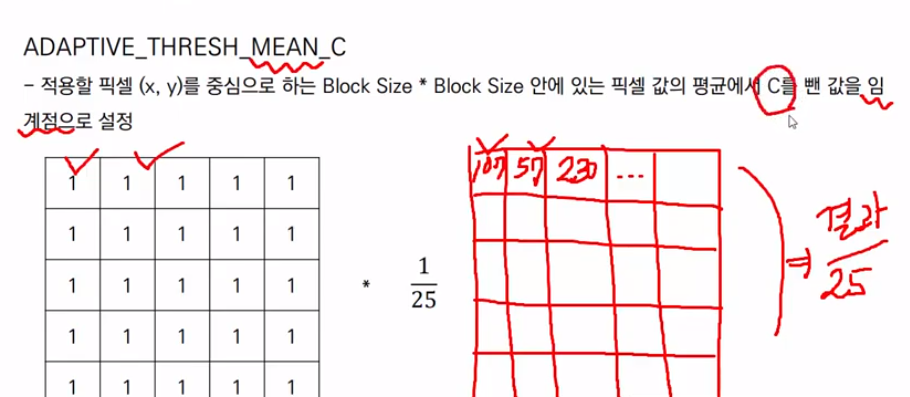

raw


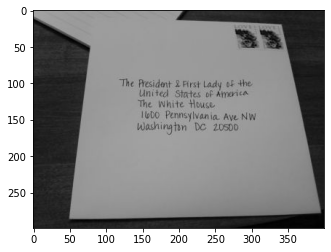

thresh_binary


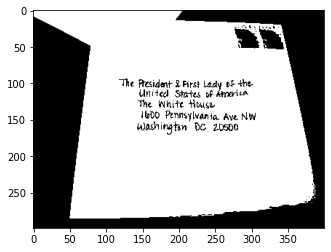

adaptive_mean_thresh_binary


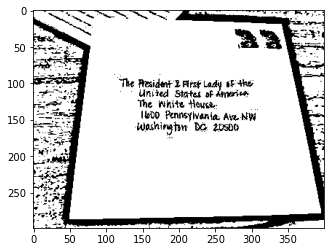

In [45]:
import cv2
image = cv2.imread('hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21,3)

print('raw')
plt.imshow(cv2.cvtColor( image, cv2.COLOR_GRAY2RGB))
plt.show()

print('thresh_binary')
plt.imshow(cv2.cvtColor( thres1, cv2.COLOR_GRAY2RGB))
plt.show()

print('adaptive_mean_thresh_binary')
plt.imshow(cv2.cvtColor( thres2, cv2.COLOR_GRAY2RGB))
plt.show()


## ADAPTIVE_THRESH_GAUSSAIN_C
- 적용할 픽셀 (x,y)를 중심으로 하는 Block Size * Block Size 안에 있는 Gaussian 윈도우 기반의 가중치들의 합에서 C를 뺀 값을 임계점으로 설정
- 정규분포를 따르도록 함.(Gaussain window)

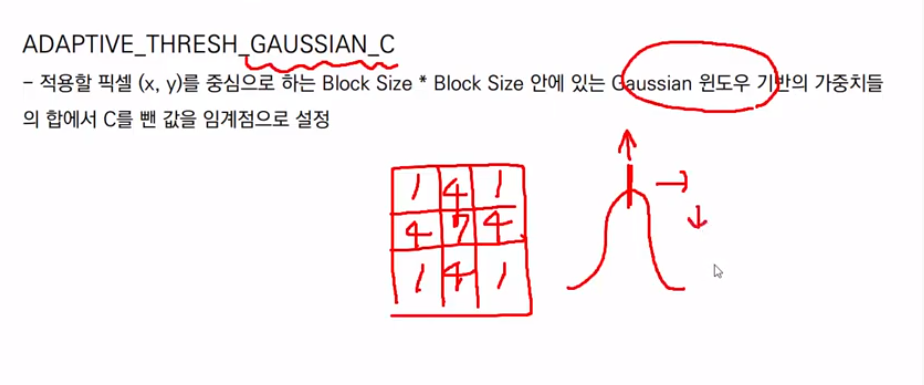

raw


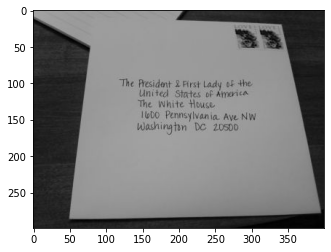

thresh_binary


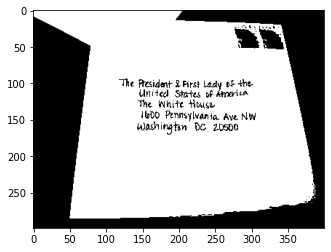

adaptive_gaussian_c_binary


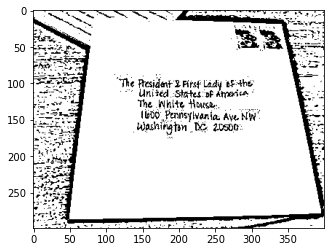

In [44]:
import cv2
image = cv2.imread('hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21,3)

print('raw')
plt.imshow(cv2.cvtColor( image, cv2.COLOR_GRAY2RGB))
plt.show()

print('thresh_binary')
plt.imshow(cv2.cvtColor( thres1, cv2.COLOR_GRAY2RGB))
plt.show()

print('adaptive_gaussian_c_binary')
plt.imshow(cv2.cvtColor( thres2, cv2.COLOR_GRAY2RGB))
plt.show()
